In [1]:
from src.pca import PCA

import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

# Synthetic data

In [2]:
cov = np.array([[4, 0.7], [0.7, .25]])
mean = np.array([-1, 3])

data = np.random.multivariate_normal(mean, cov, 1000)

(0.0, 6.0)

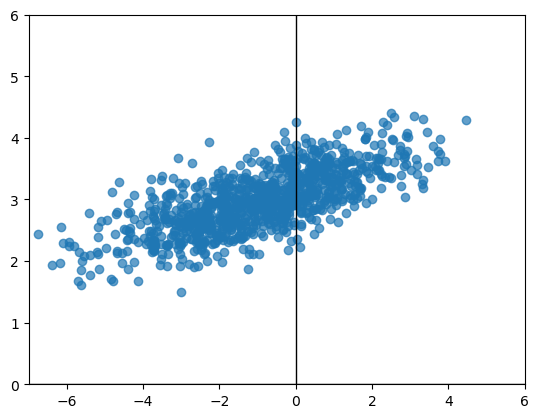

In [3]:
plt.scatter(data[:, 0], data[:, 1], alpha=0.7)

plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)
plt.xlim(-7, 6)
plt.ylim(0, 6)

In [4]:
scaler = StandardScaler()
data_std = scaler.fit_transform(data)

In [5]:
pca = PCA()
pca.fit(data_std)
pca.components_

array([[-0.70710678,  0.70710678],
       [-0.70710678, -0.70710678]])

In [6]:
pca.explained_variance_

array([1.71590517, 0.28609683])

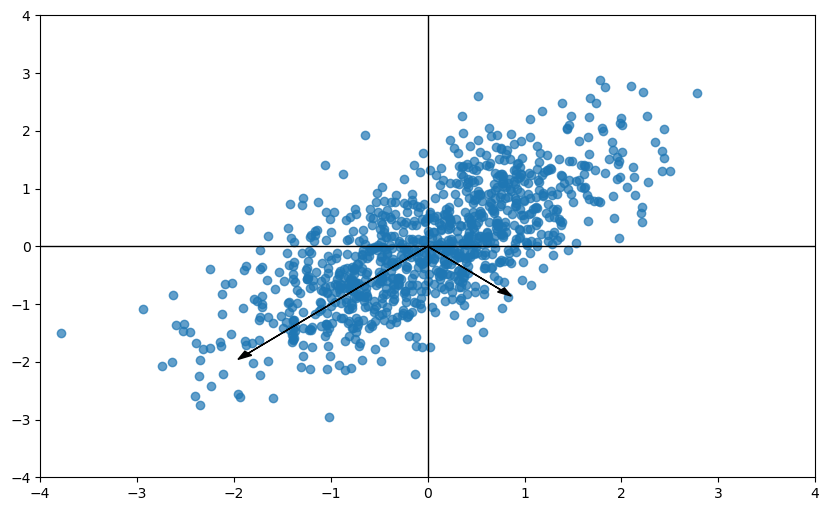

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(data_std[:, 0], data_std[:, 1], alpha=0.7)
for length, vector in zip(pca.explained_variance_, pca.components_.T):
    v = vector * np.sqrt(length) * 2
    plt.arrow(0, 0, v[0], v[1], color="black", head_width=0.1)
plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
# plt.savefig('../../resources/methods/pca.png', transparent=True)

Lets project data to first PC

In [9]:
pca = PCA(n_components=1)
data_projected = pca.fit_transform(data_std)

Text(0.5, 1.0, 'Encoded data')

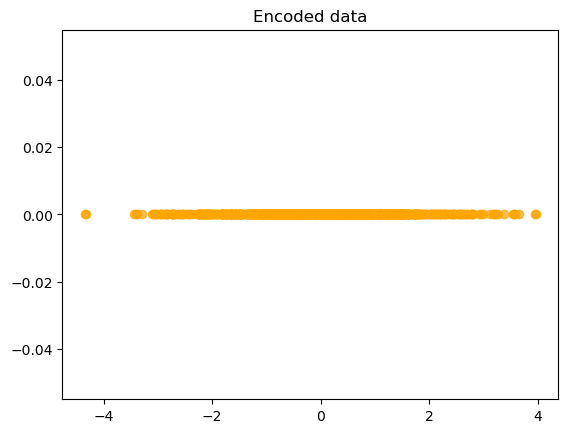

In [10]:
plt.scatter(data_projected[:, 0], np.zeros(data_projected.shape[0]), alpha=0.7, color='orange')
plt.title('Encoded data')

In [11]:
data_reconstructed = pca.inverse_transform(data_projected)
data_reconstructed = scaler.inverse_transform(data_reconstructed)

(0.0, 6.0)

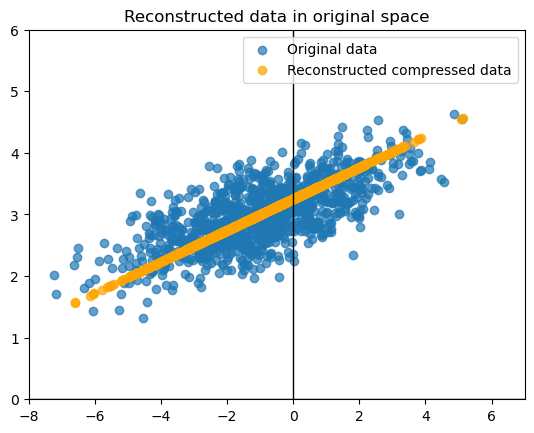

In [12]:
plt.scatter(data[:, 0], data[:, 1], alpha=0.7)
plt.scatter(data_reconstructed[:, 0], data_reconstructed[:, 1], alpha=0.7, color='orange')

plt.legend(['Original data', 'Reconstructed compressed data'], loc='best')
plt.title('Reconstructed data in original space')

plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)
plt.xlim(-8, 7)
plt.ylim(0, 6)